In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io
import scipy.special
import warnings

from optparse import OptionParser



In [3]:
# TODO: Add options to change the comparison type (abs dif, misfit function, whatever )
#parser.add_option("-1", "--file1", dest="file1", help="get input data from file", metavar="FILE")
fn1     = '/home/kblum/local/pism/sources/pism-emulator/speedemulator/experiment_dirs/exp_floating/debug_floating.nc'
coord1  = 'velsurf_mag'         
fn2     = '/home/kblum/local/pism/sources/pism-emulator/speedemulator/experiment_dirs/exp_floating/debug_no_floating.nc'
coord2  = 'velsurf_mag'
fn3     =  '/home/kblum/uaf-antarctica/data_sets/velocities/antarctica_ice_velocity_g4000m.nc'
coord3  = 'velsurf_mag'
fn4     = '/data/work/antarctica_calibration/velocities/antarctica_ice_velocity_g4000m_no_shelves.nc'
coord4  = 'velsurf_mag'

with xr.open_dataset(fn1) as data1, xr.open_dataset(fn2) as data2, xr.open_dataset(fn3) as data3, xr.open_dataset(fn4) as data4:
    modeled_floating     = data1[coord1]
    modeled_no_floating  = data2[coord2]
    reality_floating     = data3[coord3]
    reality_no_floating  = data4[coord4]
    #print(modelled)
#signed_dif_floating = reality - floating
#abs_dif_floating = abs(signed_dif_floating)
#log_dif_floating = np.log10(abs_dif_floating)
#percent_dif_floating = (abs(reality-floating)/((reality/2)+(floating/2)))*100


In [11]:
signed_dif_floating = modeled_floating - reality_floating
abs_dif_floating    = abs(signed_dif_floating)
percent_dif_floating = ( (abs_dif_floating) / ((reality_floating/2)+(modeled_floating/2)) )*100
print(np.mean(abs_dif_floating))
print(np.mean(percent_dif_floating))

<xarray.DataArray 'velsurf_mag' ()>
array(37.470173, dtype=float32)
<xarray.DataArray 'velsurf_mag' ()>
array(79.179565, dtype=float32)


In [7]:
signed_dif_no = modeled_no_floating - reality_floating
abs_dif_no    = abs(signed_dif_no)
percent_dif_no_floating = ( (abs_dif_no) / ((reality_floating/2)+(modeled_no_floating/2)) )*100
print(np.mean(abs_dif_no))
print(np.mean(percent_dif_no_floating))

<xarray.DataArray 'velsurf_mag' ()>
array(50.957977, dtype=float32)
<xarray.DataArray 'velsurf_mag' ()>
array(79.14552, dtype=float32)


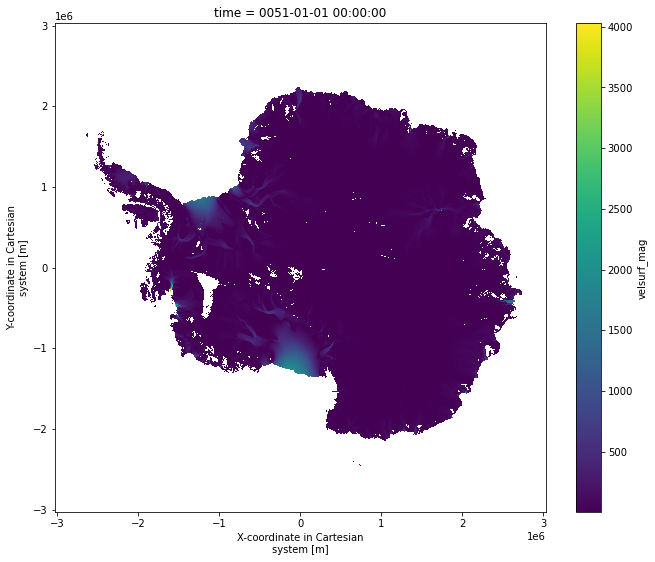

In [17]:
plt.figure(figsize=(11,9))
abs_dif_no.plot()

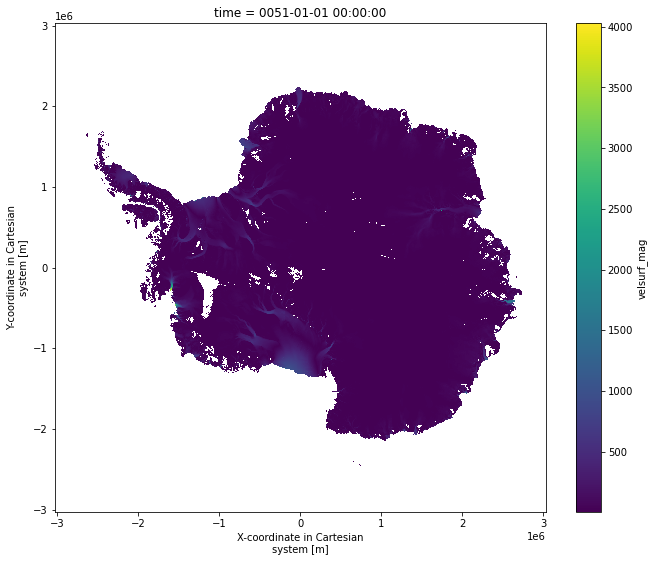

In [18]:
plt.figure(figsize=(11,9))
abs_dif_floating.plot()

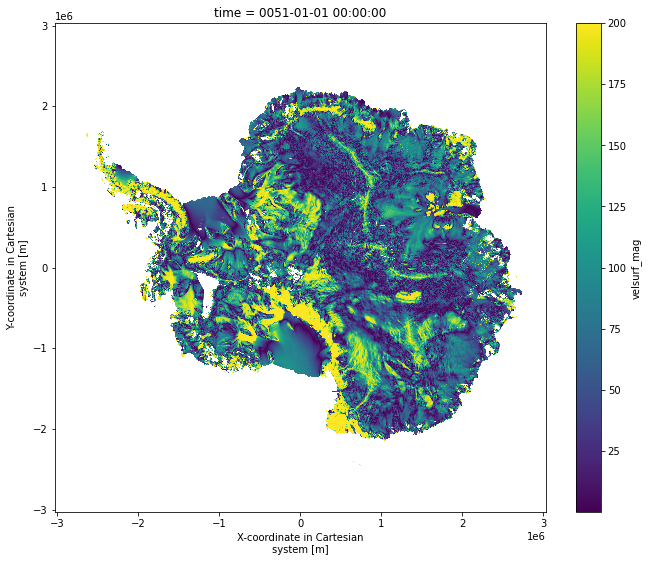

In [8]:
plt.figure(figsize=(11,9))
percent_dif_no_floating.plot()

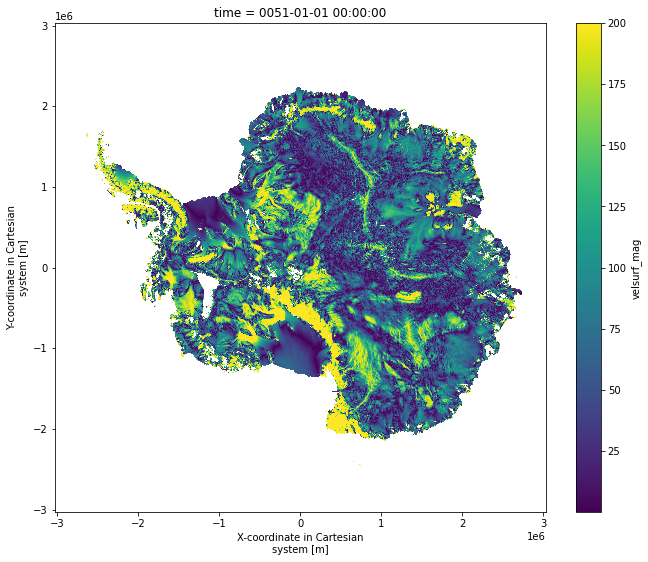

In [10]:
plt.figure(figsize=(11,9))
percent_dif_floating.plot()

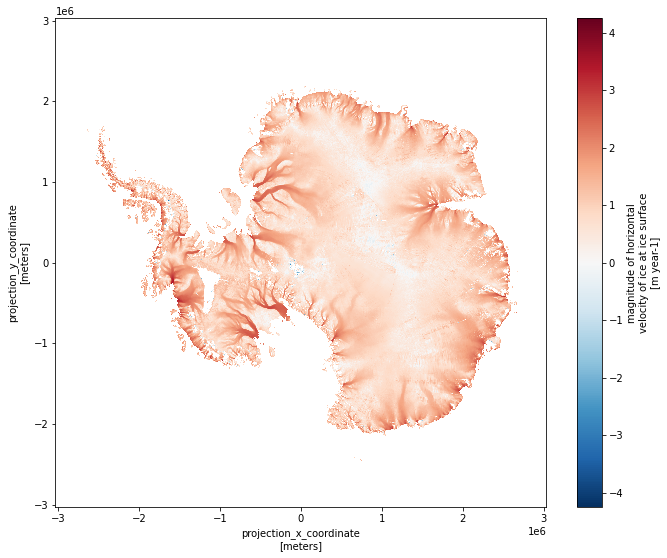

In [15]:
plt.figure(figsize=(11,9))
np.log10(reality_no_floating).plot()